# **Inteligência Artificial aplicada à Visão Computacional**

**Capítulo 6: Visão Computacional aplicada ao reconhecimento de emoções**



<p align="justify">

Todos os direitos reservados à Facti, 2024
<p>

[www.qualifacti.com.br](https://)

---

<p align="justify">
É importante esclarecer que estas atividades não compõem a avaliação e não haverá correção formal por parte dos instrutores; o objetivo é a autoaprendizagem e prática.
<p>

---

# **Atividade de experimentação 66**

Testando o modelo do detector de emoções com múltiplas faces

## Importando as bibliotecas

In [ ]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.15.0'

## Conectando com o Drive e acessando os arquivos

In [ ]:
# Conectando o Colab ao Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Realize o dowload da pasta Material_complementar_reconhecimento_emocoes.zip do Google Sala de Aula e transfira-a para o seu Google Drive
# Localize o caminho da pasta no menu Arquivos, no menu lateral esquerdo
path = "/content/gdrive/MyDrive/Material_complementar_reconhecimento_emocoes.zip"
zip_object = zipfile.ZipFile(file = path, mode = "r")
zip_object.extractall('./')
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/gdrive/MyDrive/Material_complementar_reconhecimento_emocoes.zip' mode='r'>>

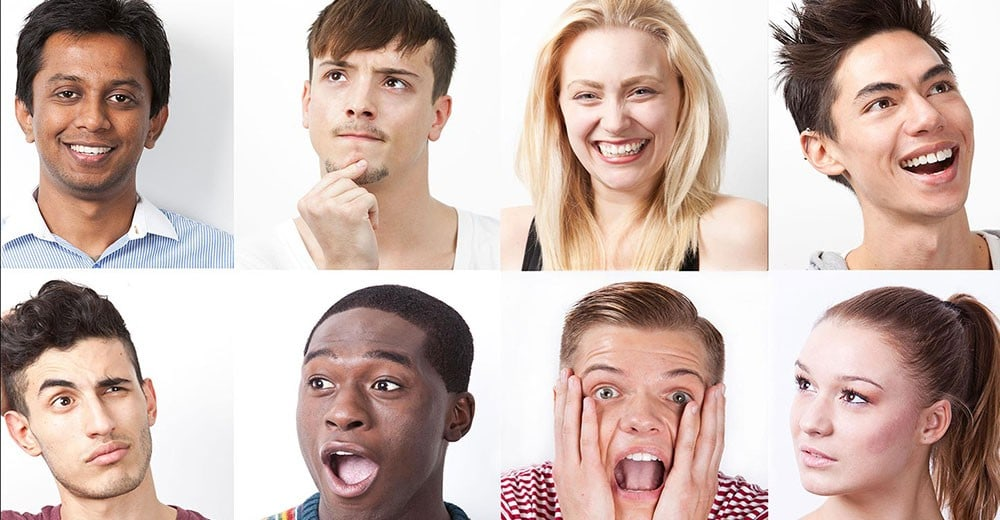

In [ ]:
# Selecione uma imagem da pasta "testes" para o reconhecimento da emoção
imagem = cv2.imread('/content/testes/teste06.jpg')
cv2_imshow(imagem)

## Testando o detector

**Carregamento dos modelos**

In [ ]:
# Utilize um haarcasdade pré treinado para o reconhecimento facial
# Utilize um modelo pré treinado para o reconhecimento das emoções
cascade_faces = "/content/haarcascade_frontalface_default.xml"
caminho_modelo = "/content/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile = False)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

**Detecção de faces**

In [ ]:
# Detecta faces na imagem selecionada
faces = face_detection.detectMultiScale(imagem, scaleFactor = 1.05,
                                        minNeighbors = 5, minSize = (40,40))
faces

array([[762,  16,  58,  58],
       [288,  17, 153, 153],
       [ 20,  37, 146, 146],
       [545,  40, 138, 138],
       [826,  31, 167, 167],
       [263, 313, 177, 177],
       [740, 325, 167, 167],
       [ 16, 336, 148, 148],
       [545, 317, 197, 197]], dtype=int32)

In [ ]:
# Quantidade de faces encontradas pelo modelo
len(faces)

9

**Processamento para cada rosto detectado**

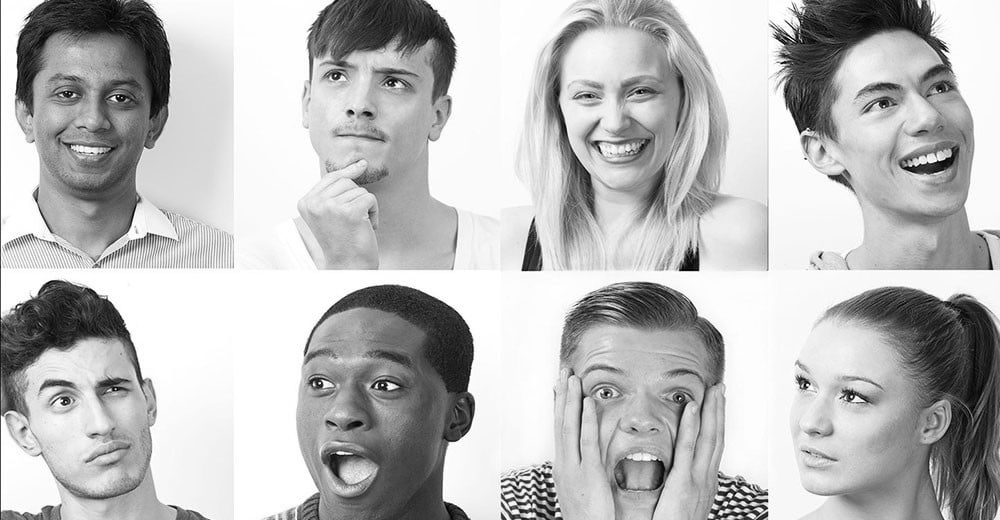

In [ ]:
# Convertendo a imagem em escala de cinza
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(cinza)

Com o *for* são realizados as etapas para cada face detectada:
* Extração do ROI (região de interesse)
* Redimensionamento
* Normalização
* Previsões e resultado

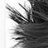

1/1 [==============================] - 0s 402ms/step
[3.67190130e-02 6.35756442e-05 1.40933961e-01 3.00296233e-03
 7.09944844e-01 2.81392829e-04 1.09054305e-01]
0.70994484
4


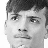

1/1 [==============================] - 0s 33ms/step
[0.09885688 0.00113971 0.11588739 0.04880436 0.15462403 0.02733555
 0.55335206]
0.55335206
6


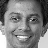

1/1 [==============================] - 0s 30ms/step
[5.1900468e-05 3.3626257e-08 4.1845586e-05 9.8133332e-01 6.4739674e-05
 6.4568761e-05 1.8443629e-02]
0.9813333
3


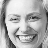

1/1 [==============================] - 0s 28ms/step
[1.2569408e-05 2.3475217e-09 4.4533575e-05 9.9945647e-01 1.1358200e-05
 9.6398784e-05 3.7875547e-04]
0.99945647
3


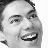

1/1 [==============================] - 0s 28ms/step
[3.4015532e-06 8.7148740e-11 1.8078877e-05 9.9992526e-01 1.1114629e-06
 3.9058123e-05 1.3126600e-05]
0.99992526
3


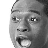

1/1 [==============================] - 0s 29ms/step
[0.13155575 0.01113689 0.2502073  0.10957952 0.17402463 0.14212921
 0.18136668]
0.2502073
2


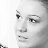

1/1 [==============================] - 0s 28ms/step
[0.09188871 0.00061099 0.12205496 0.01243877 0.198452   0.01007629
 0.5644783 ]
0.5644783
6


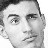

1/1 [==============================] - 0s 33ms/step
[0.10052431 0.00120572 0.13441353 0.01898042 0.20600265 0.01727436
 0.52159905]
0.52159905
6


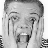

1/1 [==============================] - 0s 30ms/step
[0.0533832  0.00296495 0.72208923 0.00261919 0.05246408 0.15908694
 0.00739246]
0.72208923
2


In [ ]:
original = imagem.copy()

for (x, y, w, h) in faces:
  # Extração do ROI (região de interesse)
  roi = cinza[y:y + h, x:x + w] # utiliza-se as coordenadas (onde inicia a face) e a largura e altura para extrair a região de interesse

  # Redimensiona imagem
  roi = cv2.resize(roi, (48, 48))

  cv2_imshow(roi)

  # Normalização
  roi = roi.astype("float") / 255
  roi = img_to_array(roi)
  roi = np.expand_dims(roi, axis = 0)

  # Previsões
  preds = classificador_emocoes.predict(roi)[0]
  print(preds)

  # Emoção detectada
  emotion_probability = np.max(preds)
  print(emotion_probability)

  print(preds.argmax())
  label = expressoes[preds.argmax()]


  # Mostra resultado na tela para o rosto
  cv2.putText(original, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)



## Resultado final

> Perceba que no resultado final algumas faces não foram detectadas pelo haarscascade. Para solucionar, você pode fazer ajustes nos parâmetros no método `detectMultiScale`

> Na última imagem, o algoritmo detectou duas faces. Também poderiam ser feito ajustes nos parâmetros ou então utilizar o Dlib para a detecção de faces, que é uma biblioteca com resultados melhores.

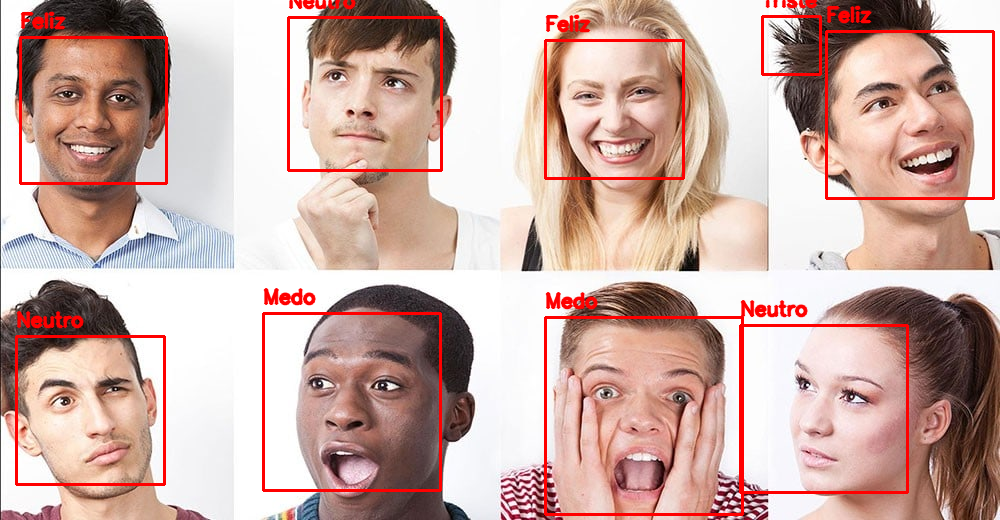

In [ ]:
cv2_imshow(original)